In [6]:
import os
# import math
from itertools import repeat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)  # if you need to view less rows, comment
# pd.set_option('display.max_rows', None)  # if you need to view more rows, uncomment
mean = 'mean'
std = 'std'
idx_slice = pd.IndexSlice

In [7]:
file_location = '/home/kmeador/SEC' # escher
# file_location = '/home/kylemeador' # powerpanda
file_name = '211123 T33_F3_conc_elution_conc_SEC_mishap_20_andF5_F6_F9'

In [8]:
extension = 'csv'
analysis_file = os.path.join(file_location, '%s.%s' % (file_name, extension))

In [9]:
# for datasets that are exported with volumes for every measurement
# sec_data_df = pd.read_csv(analysis_file, header=[0,1])
# For datasets that are exported with normalize volumes
sec_data_df = pd.read_csv(analysis_file, header=[0,1], index_col=0)

In [10]:
sec_data_df.head()

T33_F3_conc_elution_conc_SEC_mishap_200ul_real                   \
X_Axis_volume                               UV1 (215 nm)_mAU UV3 (280 nm)_mAU   
-0.997123                                           0.000000              0.0   
-0.996098                                           0.000000              0.0   
-0.995209                                        -190.118998              0.0   
-0.994070                                        -190.118998              NaN   
-0.993158                                        -190.118998              NaN   

              T33_F5_elution_strait                   \
X_Axis_volume      UV1 (215 nm)_mAU UV3 (280 nm)_mAU   
-0.997123                       NaN              NaN   
-0.996098                 -2.215259              0.0   
-0.995209                 -4.400000              NaN   
-0.994070                 -4.400000              NaN   
-0.993158                 -4.400000              NaN   

              T33_F6_conc_elution_400ul                   \
X_Axis_volume          UV1 (215 nm)_mAU UV3 (280 nm)_mAU   
-0.997123                           NaN              NaN   
-0.996098                     -7.589866              0.0   
-0.995209                      0.000000              0.0   
-0.994070                    -16.953964              0.0   
-0.993158                    -18.813999              NaN   

              T33_F9_elution_conc_380ul                   
X_Axis_volume          UV1 (215 nm)_mAU UV3 (280 nm)_mAU  
-0.997123                           NaN              NaN  
-0.996098                    -83.872051              0.0  
-0.995209                      0.000000              0.0  
-0.994070                   -155.581412              0.0  
-0.993158                   -174.904004              NaN

In [6]:
def split_biorad_chromatogram_dataframe_to_unique_runs(df):
    """From a DataFrame with multiple column headers representing unique SEC runs, extract each run as a separate DataFrame"""
    split_dfs = []
    for run in df.columns.levels[0].to_list():
        split_dfs.append(df.loc[:, idx_slice[run, :]])
    
    return split_dfs

In [7]:
def extract_volume_and_uv_columns_from_biorad_chromatogram(df):
    uv_columns = []
    volume = None
    for column in df.columns.levels[-1].to_list():
        if column.startswith('UV'):
            if column.endswith('_volume'):
                volume = column
            else:
                uv_columns.append(column)
                
    if volume:
        return volume, uv_columns
    else:
        return 

In [8]:
sec_runs = split_biorad_chromatogram_dataframe_to_unique_runs(sec_data_df)
# chromatogram_graph_data = [extract_volume_and_uv_columns_from_biorad_chromatogram(run_df) for run_df in sec_runs]

In [9]:
volume, uv_columns = chromatogram_graph_data[0]
print(volume, uv_columns)

NameError: name 'chromatogram_graph_data' is not defined

In [10]:
def plot_chromatograms(sec_runs, volume_is_column=False):
#     vol_idx, uv_idx = 0, 1
    for idx, run_df in enumerate(sec_runs):
        uv_columns = []
        volume = None
        for column in run_df.columns.levels[-1].to_list():
            if column.startswith('UV'):
                if column.endswith('_volume'):
                    volume = column
                else:
                    uv_columns.append(column)

        if volume_is_column and volume:      
            selected_columns = [volume] + uv_columns
        else:
            selected_columns = uv_columns
        
#         volume, uv_columns = chromatogram_graph_data[idx] # [vol_idx], chromatogram_graph_data[idx][uv_idx]
        formatted_df = run_df.loc[:, idx_slice[:, selected_columns]].droplevel(0, axis=1)
        # grab first level, first (and only index)
        # df_title = run_df.columns.levels[0].unique()  # Doesn't work as grabs old levels from original DF
        df_title = run_df.columns.get_level_values(0).unique()
        if len(df_title) != 1:
            print('Error, multiple headers detected in dataframe %s!\n%s' % (df_title, run_df.head()))
            break
        # formatted_df = formatted_df[formatted_df[volume] > 0.007]
        # format the volume as the dependent variable
        if volume_is_column:      
            formatted_df.index = formatted_df[volume]
            formatted_df.drop(volume, axis=1, inplace=True)
        formatted_df.index.name = 'Volume'
        
        # format column names to be pretty
        formatted_df.columns = formatted_df.columns.map(dict(zip(formatted_df.columns, 
            map(str.strip, 
                map(str.strip, 
                    map(str.replace, 
                        map(str.replace, formatted_df.columns, repeat('_mAU'), repeat('')),
                        repeat('UV'), repeat('')), 
                    repeat('1234567890 ')), 
                repeat('()')))))
        formatted_df.plot(title=df_title[0])
    
    plt.show()    

In [25]:
sec_runs2 = split_biorad_chromatogram_dataframe_to_unique_runs(sec_data_df2)
# chromatogram_graph_data2 = [extract_volume_and_uv_columns_from_biorad_chromatogram(run_df) for run_df in sec_runs2]

In [17]:
volume, uv_columns = chromatogram_graph_data2[0]
print(volume, uv_columns)

None ['UV1 (215 nm)_mAU', 'UV2 (255 nm)_mAU', 'UV3 (280 nm)_mAU', 'UV4 (490 nm)_mAU']


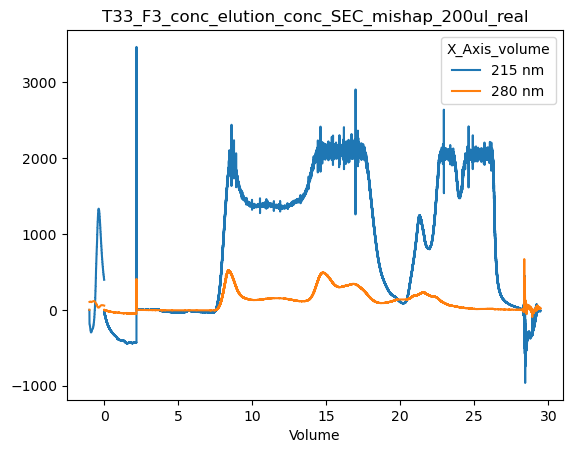

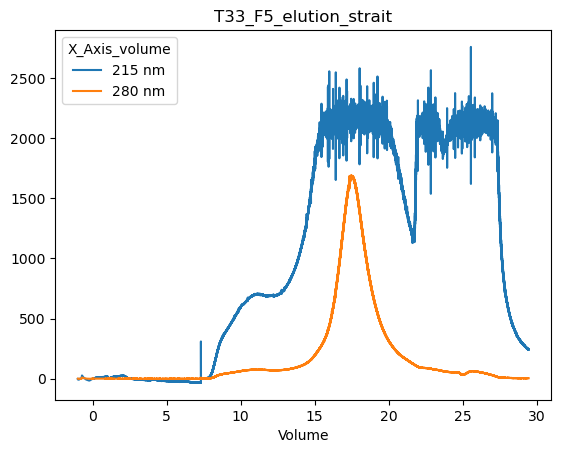

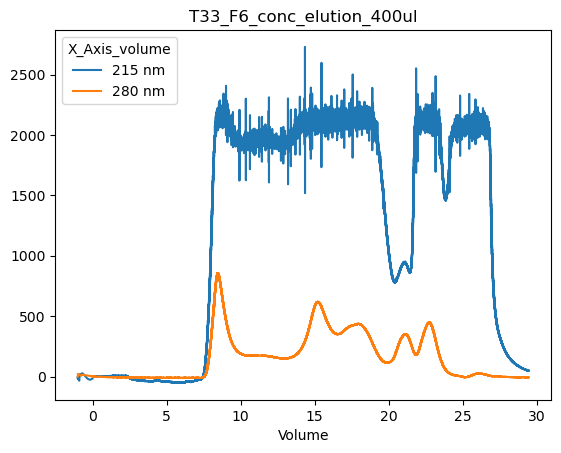

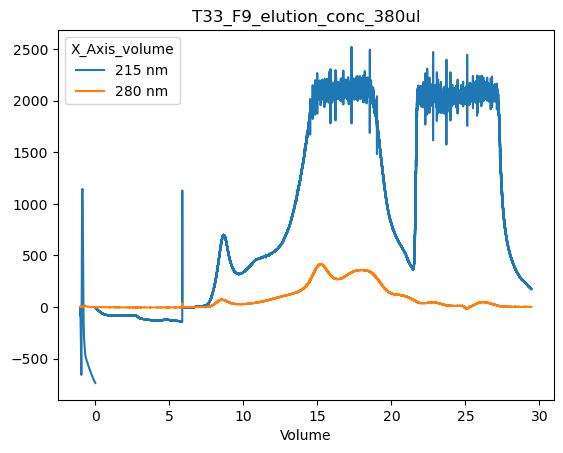

In [11]:
plot_chromatograms(sec_runs)
# plot_chromatograms(sec_runs2)

In [85]:
figure_aspect_ratio = (10, 4)
fig = plt.figure(figsize=figure_aspect_ratio)
uv_ax = fig.subplots(1, 1)
uv_ax.plot(formatted_df, ) # label='Contact Order', color='#fbc0cb', lw=1, linestyle='-'

In [86]:
fig.clear()